In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
SEED = 42

In [4]:
df_raw = pd.read_csv("data/HTRU_2.csv")

labels = ["profile_mean", "profile_stdev", "profile_skewness", "profile_kurtosis", "dm_mean", "dm_stdev", "dm_skewness", "dm_kurtosis", "pulsar"]
df_raw.columns = labels

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   profile_mean      17897 non-null  float64
 1   profile_stdev     17897 non-null  float64
 2   profile_skewness  17897 non-null  float64
 3   profile_kurtosis  17897 non-null  float64
 4   dm_mean           17897 non-null  float64
 5   dm_stdev          17897 non-null  float64
 6   dm_skewness       17897 non-null  float64
 7   dm_kurtosis       17897 non-null  float64
 8   pulsar            17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
df = df_raw[["profile_kurtosis", "profile_skewness", "pulsar"]]

In [6]:
X = df[["profile_kurtosis", "profile_skewness"]]
y = df["pulsar"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [7]:
rfc = RandomForestClassifier(random_state=SEED)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)


In [8]:
print(f"Acurácia: {100*accuracy_score(y_test, y_pred):.1f}%")
print(classification_report(y_test, y_pred))


Acurácia: 97.6%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.88      0.84      0.86       328

    accuracy                           0.98      3580
   macro avg       0.93      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



/Users/gabrielaidar/Desktop/Mestrado/aprendizado_de_maquina/_projeto/projeto-aprendizado-de-maquina/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


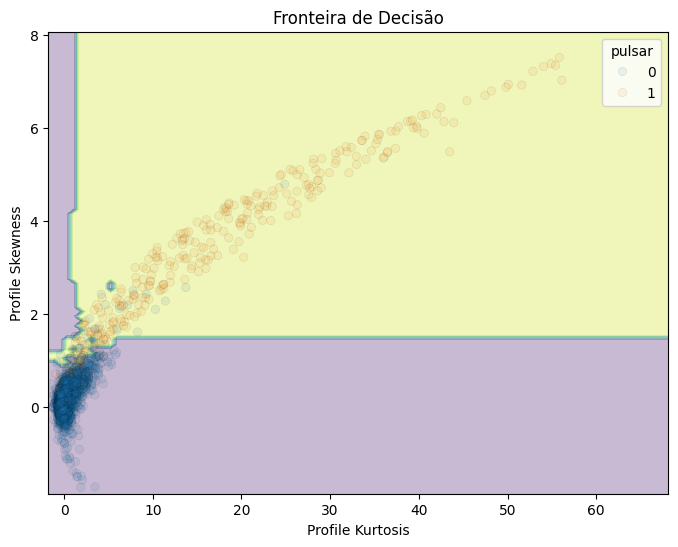

In [9]:
xx, yy = np.meshgrid(np.linspace(X["profile_kurtosis"].min(), X["profile_kurtosis"].max(), 100),
                     np.linspace(X["profile_skewness"].min(), X["profile_skewness"].max(), 100))
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_test["profile_kurtosis"], y=X_test["profile_skewness"], hue=y_test, edgecolor="k", alpha= 0.09)
plt.xlabel("Profile Kurtosis")
plt.ylabel("Profile Skewness")
plt.title("Fronteira de Decisão")
plt.show()
